<a href="https://colab.research.google.com/github/Kyrylo-Bakumenko/TARC/blob/master/TeensyPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_excel('/content/TARC Rocket lauch.xlsx', sheet_name='teensy data')
data = data.rename(columns={'timelapse, milis': 'time (s)', 'acc X': 'accx', 'acc Y': 'accy', 'acc Z': 'accz'})
data.drop_duplicates(inplace=True)
data['time (s)'] = data['time (s)']/1000
data['dT'] = data['time (s)'] - data['time (s)'].shift(1, fill_value = 0)
data.head(20)

,time (s),flight number,altitude,euler X,euler Y,euler Z,accx,accy,accz,dT
0,0.062,7,0.27,279.19,83.00,9.16,23.94,-0.13,0.04,0.062
1,0.084,7,0.57,279.19,83.00,4.94,27.25,-0.72,0.07,0.022
2,0.102,7,1.11,279.19,83.00,4.19,28.37,-2.12,0.14,0.018
3,0.122,7,1.94,279.19,83.00,3.83,28.84,-3.76,0.23,0.020
4,0.142,7,3.14,279.19,83.00,3.52,29.09,-2.55,0.35,0.020
5,0.163,7,4.57,279.20,83.00,3.37,29.24,-5.48,0.39,0.021
6,0.182,7,6.29,279.20,83.00,3.20,29.34,-7.12,0.42,0.019
7,0.202,7,8.02,279.20,83.00,2.89,29.41,-8.21,0.44,0.020
8,0.222,7,9.52,279.20,83.00,2.47,29.46,-8.93,0.43,0.020
9,0.243,7,10.80,279.20,83.01,1.87,29.50,-9.64,0.41,0.021


In [ ]:
data['dVx'] = data['dT']*data['accx'].shift(1, fill_value = 0)
data['Vx'] = data['dVx'].cumsum()
data['dSx'] = data['dT']*data['Vx'].shift(1, fill_value = 0) + 0.5*data['accx'].shift(1, fill_value = 0)*(data['dT']**2)
data['Sx'] = data['dSx'].cumsum()

data['dVy'] = data['dT']*data['accy'].shift(1, fill_value = 0)
data['Vy'] = data['dVy'].cumsum()
data['dSy'] = data['dT']*data['Vy'].shift(1, fill_value = 0) + 0.5*data['accx'].shift(1, fill_value = 0)*(data['dT']**2)
data['Sy'] = data['dSy'].cumsum()

data['dVz'] = data['dT']*data['accz'].shift(1, fill_value = 0)
data['Vz'] = data['dVz'].cumsum()
data['dSz'] = data['dT']*data['Vz'].shift(1, fill_value = 0) + 0.5*data['accx'].shift(1, fill_value = 0)*(data['dT']**2)
data['Sz'] = data['dSz'].cumsum()

data.head(20)

,time (s),flight number,altitude,euler X,euler Y,euler Z,accx,accy,accz,dT,dVx,Vx,dSx,Sx,dVy,Vy,dSy,Sy,dVz,Vz,dSz,Sz
0,0.062,7,0.27,279.19,83.00,9.16,23.94,-0.13,0.04,0.062,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0.084,7,0.57,279.19,83.00,4.94,27.25,-0.72,0.07,0.022,0.52668,0.52668,0.005793,0.005793,-0.00286,-0.00286,0.005793,0.005793,0.00088,0.00088,0.005793,0.005793
2,0.102,7,1.11,279.19,83.00,4.19,28.37,-2.12,0.14,0.018,0.49050,1.01718,0.013895,0.019688,-0.01296,-0.01582,0.004363,0.010156,0.00126,0.00214,0.004430,0.010224
3,0.122,7,1.94,279.19,83.00,3.83,28.84,-3.76,0.23,0.020,0.56740,1.58458,0.026018,0.045706,-0.04240,-0.05822,0.005358,0.015514,0.00280,0.00494,0.005717,0.015941
4,0.142,7,3.14,279.19,83.00,3.52,29.09,-2.55,0.35,0.020,0.57680,2.16138,0.037460,0.083165,-0.07520,-0.13342,0.004604,0.020118,0.00460,0.00954,0.005867,0.021807
5,0.163,7,4.57,279.20,83.00,3.37,29.24,-5.48,0.39,0.021,0.61089,2.77227,0.051803,0.134969,-0.05355,-0.18697,0.003613,0.023730,0.00735,0.01689,0.006615,0.028422
6,0.182,7,6.29,279.20,83.00,3.20,29.34,-7.12,0.42,0.019,0.55556,3.32783,0.057951,0.192920,-0.10412,-0.29109,0.001725,0.025456,0.00741,0.02430,0.005599,0.034021
7,0.202,7,8.02,279.20,83.00,2.89,29.41,-8.21,0.44,0.020,0.58680,3.91463,0.072425,0.265344,-0.14240,-0.43349,0.000046,0.025502,0.00840,0.03270,0.006354,0.040375
8,0.222,7,9.52,279.20,83.00,2.47,29.46,-8.93,0.43,0.020,0.58820,4.50283,0.084175,0.349519,-0.16420,-0.59769,-0.002788,0.022714,0.00880,0.04150,0.006536,0.046911
9,0.243,7,10.80,279.20,83.01,1.87,29.50,-9.64,0.41,0.021,0.61866,5.12149,0.101055,0.450574,-0.18753,-0.78522,-0.006056,0.016658,0.00903,0.05053,0.007367,0.054278


In [ ]:
# Import dependencies
import plotly
plotly.io.renderers.default = 'colab'
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
#plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=data.Sz,
    y=data.Sy,  # <-- Put your data instead
    z=data.Sx,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 4,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)


plot_figure = go.Figure(data=[trace], layout=layout)

plot_figure.show()

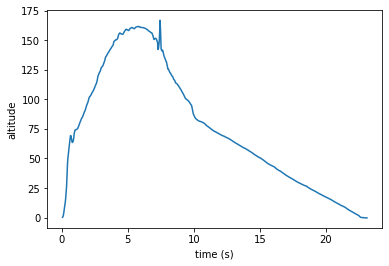

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# x will be 5, 6, 7... but also twiddled randomly
x = data['time (s)']
# y will be 10, 11, 12... but twiddled even more randomly
y = data.altitude
sns.lineplot(x, y)
plt.show()

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
# example
import plotly.graph_objects as go
fig = go.Figure([ go.Scatter(x=data['time (s)'], y=data['euler X'] ), go.Scatter(x=data['time (s)'], y=data['euler Y'] ), go.Scatter(x=data['time (s)'], y=data['euler Z'] ) ] )
fig.show()

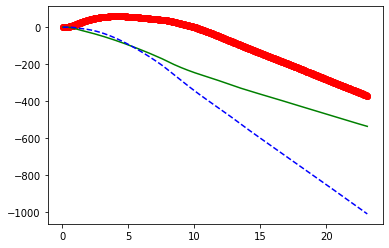

In [ ]:
from scipy import integrate

x = data['time (s)']
y = data.accx
x_int = integrate.cumtrapz(y, x, initial=0)
x_int2 = integrate.cumtrapz(x_int, x, initial=0)

y_int = integrate.cumtrapz(data.accy, x, initial=0)
y_int2 = integrate.cumtrapz(y_int, x, initial=0)

z_int = integrate.cumtrapz(data.accz, x, initial=0)
z_int2 = integrate.cumtrapz(z_int, x, initial=0)

plt.plot(x, x_int2, 'ro', x, y_int2, 'g-', x, z_int2, 'b--')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=z_int2, y=y_int2, z=x_int2,
              color=data.altitude)

fig.show()

In [ ]:
fig2 = px.scatter_3d(x=z_int, y=y_int, z=x_int,
              color=data.altitude)

fig2.show()